In [113]:
#Loading the Data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Reading The CSV
data=pd.read_csv('crime.csv',engine='python')

Pre Processing The Data to Generate Decision Trees

In [114]:
data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [117]:
data['SHOOTING']=data['SHOOTING'].fillna(0)
data['SHOOTING']=data['SHOOTING'].map({0: 0,'Y':1})

data.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1774
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  93
STREET                 10977
Lat                    20632
Long                   20632
Location                   0
dtype: int64

In [125]:
#Drop All Null Values
datanew= data.dropna()
datanew.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [126]:
datanew['NightTime'] = 0


C:\Users\akrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [131]:
datanew['NightTime'].loc[(datanew['HOUR'] >= 20)] = 1
datanew['NightTime'].loc[(datanew['HOUR'] <= 5)] = 1
datanew.head()

C:\Users\akrit\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\akrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\akrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NightTime
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,0,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",1
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,0,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)",1
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,0,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)",0
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,0,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)",1
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,0,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)",1


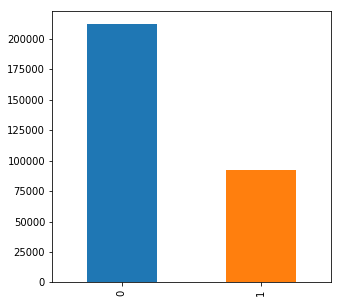

In [134]:
plt.figure(figsize=(5,5))
datanew['NightTime'].value_counts().plot.bar()
plt.show()

In [137]:
datanew['OFFENSE_CODE_GROUP'].value_counts().head(10)

#Analysing The Top Ten Offense Groups

Motor Vehicle Accident Response    31186
Larceny                            25808
Medical Assistance                 23041
Investigate Person                 18379
Other                              17508
Simple Assault                     15264
Vandalism                          15234
Drug Violation                     14829
Verbal Disputes                    13321
Towed                              11061
Name: OFFENSE_CODE_GROUP, dtype: int64

In [175]:
OFFENSE_CODE_GROUP_SELECTED = ('Motor Vehicle Accident Response','Larceny','Medical Assistance','Investigate Person','Other', 
            'Drug Violation'
                               #, 'Simple Assault', 'Vandalism', 'Verbal Disputes', 'Towed'
                              )

In [177]:
processedData = pd.DataFrame()
k = 0
while k<len(OFFENSE_CODE_GROUP_SELECTED):
    processedData = processedData.append(datanew.loc[datanew['OFFENSE_CODE_GROUP']==OFFENSE_CODE_GROUP_SELECTED[k]])
    k = k+1
processedData.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NightTime
10,I182080043,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,11,659,0,2018-10-03 19:33:00,2018,10,6,19,Part Three,2735,42.344323,-71.157784,"(42.34432328, -71.15778368)",0
20,I182080030,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,10,545,0,2018-10-02 20:00:00,2018,10,5,20,Part Three,2650,42.330015,-71.038513,"(42.33001489, -71.03851306)",1
68,I182079979,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,9,823,0,2018-10-03 15:13:00,2018,10,6,15,Part Three,3542,42.310910,-71.057674,"(42.31091044, -71.05767414)",0
72,I182079974,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,11,689,0,2018-10-01 19:00:00,2018,10,1,19,Part Three,2656,42.342592,-71.155817,"(42.34259153, -71.15581674)",0
77,I182079969,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,7,473,0,2018-10-03 15:51:00,2018,10,6,15,Part Three,176,42.339727,-71.108683,"(42.33972732, -71.10868260)",0


In [195]:
transform_labels=processedData.iloc[:,:]
transform_labels.loc[:,'STREET']=LabelEncoder().fit_transform(transform_labels.loc[:,'STREET'].astype('str'))
transform_labels.loc[:,'DISTRICT']=LabelEncoder().fit_transform(transform_labels.loc[:,'DISTRICT'].astype('str'))
transform_labels.loc[:,'REPORTING_AREA']=LabelEncoder().fit_transform(transform_labels.loc[:,'REPORTING_AREA'].astype('str'))
transform_labels.loc[:,'DAY_OF_WEEK']=LabelEncoder().fit_transform(transform_labels.loc[:,'DAY_OF_WEEK'])
transform_labels.loc[:,'OFFENSE_CODE_GROUP']=LabelEncoder().fit_transform(transform_labels.loc[:,'DISTRICT'].astype('str'))

transform_labels.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NightTime
10,I182080043,3803,7,M/V ACCIDENT - PERSONAL INJURY,5,581,0,2018-10-03 19:33:00,2018,10,6,19,Part Three,951,42.344323,-71.157784,"(42.34432328, -71.15778368)",0
20,I182080030,3831,6,M/V - LEAVING SCENE - PROPERTY DAMAGE,4,440,0,2018-10-02 20:00:00,2018,10,5,20,Part Three,854,42.330015,-71.038513,"(42.33001489, -71.03851306)",1
68,I182079979,3831,5,M/V - LEAVING SCENE - PROPERTY DAMAGE,3,784,0,2018-10-03 15:13:00,2018,10,6,15,Part Three,1906,42.310910,-71.057674,"(42.31091044, -71.05767414)",0
72,I182079974,3831,7,M/V - LEAVING SCENE - PROPERTY DAMAGE,5,617,0,2018-10-01 19:00:00,2018,10,1,19,Part Three,860,42.342592,-71.155817,"(42.34259153, -71.15581674)",0
77,I182079969,3820,3,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,11,352,0,2018-10-03 15:51:00,2018,10,6,15,Part Three,3290,42.339727,-71.108683,"(42.33972732, -71.10868260)",0


In [224]:
from sklearn.model_selection import train_test_split
datanew= transform_labels.dropna()
train_data, test_data= train_test_split(datanew, random_state=0, test_size=0.05)

print(len(train_data))
print(len(test_data))


124213
6538


In [225]:
train_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NightTime
212363,I162067158,617,3,LARCENY THEFT FROM BUILDING,11,354,0,2016-05-10 08:00:00,2016,5,5,8,Part One,209,42.339325,-71.099376,"(42.33932485, -71.09937561)",0
170670,I172005538,3802,5,M/V ACCIDENT - PROPERTY DAMAGE,3,577,0,2017-01-18 20:30:00,2017,1,6,20,Part Three,1023,42.317319,-71.061509,"(42.31731905, -71.06150882)",1
157678,I172019380,613,8,LARCENY SHOPLIFTING,6,244,0,2017-03-11 17:15:00,2017,3,2,17,Part One,2332,42.348958,-71.084892,"(42.34895777, -71.08489204)",0
91074,I172090485,1810,4,DRUGS - SALE / MANUFACTURING,2,103,0,2017-10-29 16:00:00,2017,10,3,16,Part Two,228,42.284826,-71.091374,"(42.28482577, -71.09137369)",0
212661,I162066843,3006,5,SICK/INJURED/MEDICAL - PERSON,3,859,0,2016-08-18 07:45:00,2016,8,4,7,Part Three,839,42.307763,-71.066831,"(42.30776342, -71.06683062)",0


# DecisionTreeClassifier 

In [226]:
from sklearn import tree

features_train = train_data[['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK','NightTime']]
target_train = train_data[['OFFENSE_CODE_GROUP']]
features_test = test_data[['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK','NightTime']]
target_test = test_data[['OFFENSE_CODE_GROUP']]

#Creating Our classifier By Providing Training Data
clf = tree.DecisionTreeClassifier()

clf = clf.fit(features_train, target_train)

In [227]:
#Predicting for the test set using the classifier created above
target_pred = clf.predict(features_test)
target_pred

array([6, 5, 9, ..., 6, 4, 1])

In [228]:
from sklearn.metrics import classification_report
rep = classification_report(target_test, target_pred)
print(rep)

#Accurate Predictions with more Training Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       684
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       312
           3       1.00      1.00      1.00       904
           4       1.00      1.00      1.00       675
           5       1.00      1.00      1.00       863
           6       1.00      1.00      1.00       539
           7       1.00      1.00      1.00       435
           8       1.00      1.00      1.00       917
           9       1.00      1.00      1.00       350
          10       1.00      1.00      1.00       420
          11       1.00      1.00      1.00       292

   micro avg       1.00      1.00      1.00      6538
   macro avg       1.00      1.00      1.00      6538
weighted avg       1.00      1.00      1.00      6538



In [229]:
#1. The accuracy of your model on the test data

from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_pred)

1.0

In [221]:
# 2. The precision and recall values

# Calculate Precision Value

from sklearn import metrics

metrics.precision_score(target_test, target_pred, average='micro')


1.0

In [222]:
# Calculate Recall Value
# recall = TP/(TP+FN)
metrics.recall_score(target_test, target_pred, average='micro')


1.0

In [223]:
#Calculate precision, recall and fscore

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(target_test, target_pred, average='micro')

(1.0, 1.0, 1.0, None)